In [1]:
# Import relevant Python libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# Load the dataset into a DataFrame and save in a variable

data = pd.read_csv("marketing_sales_data.csv")

In [4]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [5]:
# Display number of rows, number of columns

data.shape

(572, 5)

In [6]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing

data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [7]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row


data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [8]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values


data.isna().any(axis=1).sum()

3

In [9]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result

data = data.dropna(axis=0)

In [10]:
# Check to make sure that the data does not contain any rows with missing values now

data.isna().any(axis=1).sum()

0

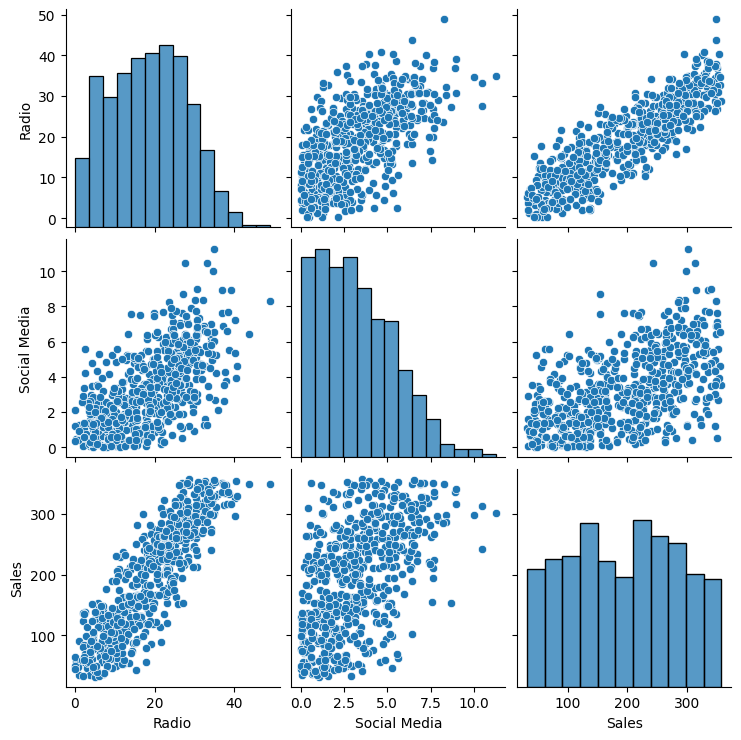

In [11]:
# Create plot of pairwise relationships

sns.pairplot(data)

In [13]:
#Model Building

In [14]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression

ols_data = data[["Radio", "Sales"]]

In [15]:
# Display first 10 rows of the new DataFrame


ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [16]:
# Write the linear regression formula
# Save it in a variable

ols_formula = "Sales ~ Radio"

In [17]:
#Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [18]:
# Implement OLS

OLS = ols(formula = ols_formula, data = ols_data)

In [19]:
#Create a linear regression model for the data and fit the model to the data.

In [20]:
# Fit the model to the data
# Save the fitted model in a variable

model = OLS.fit()

In [21]:
#Get a summary of the results from the model.

In [22]:
# Get summary of results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.07e-176
Time:                        10:34:43   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Radio', ylabel='Sales'>

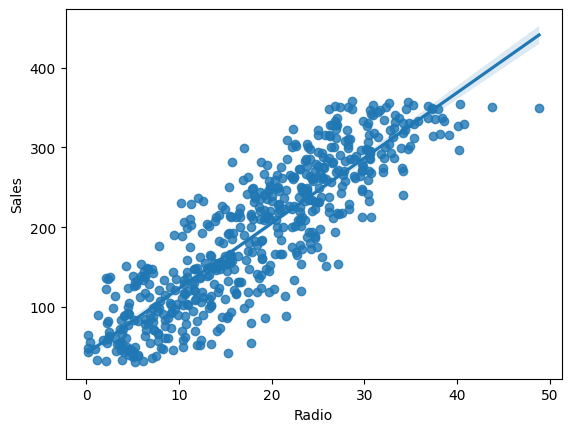

In [23]:
# Plot the OLS data with the best fit regression line


sns.regplot(x = "Radio", y = "Sales", data = ols_data)

In [24]:
# Get the residuals from the model

residuals = model.resid

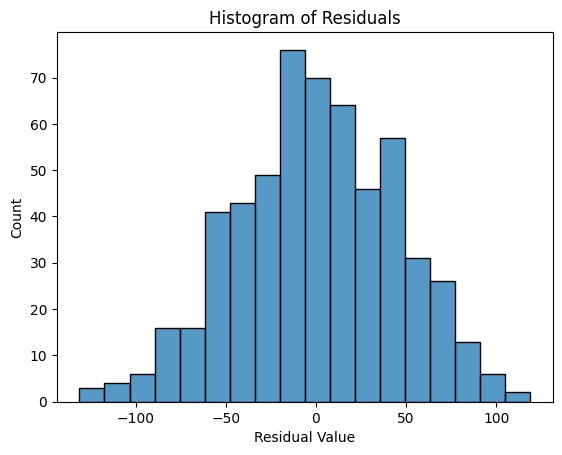

In [25]:
# Visualize the distribution of the residuals

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

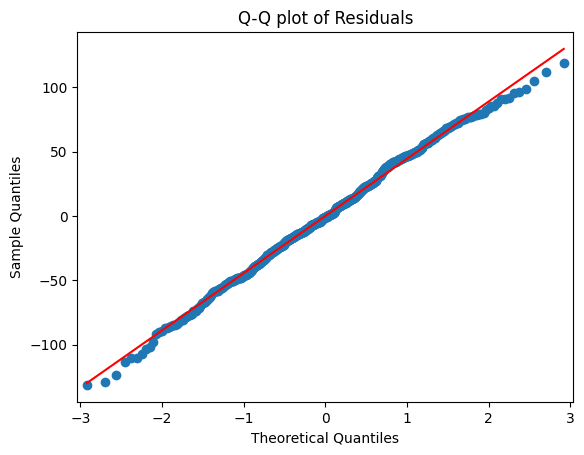

In [26]:
# Create a Q-Q plot 

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [27]:
# Get fitted values

fitted_values = model.predict(ols_data["Radio"])

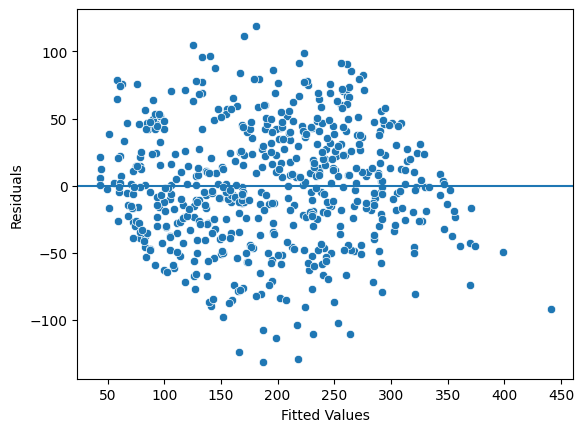

In [28]:
# Create a scatterplot of residuals against fitted values


fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()